In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
diabetes_df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
diabetes_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
#finding out number of duplicates
duplicate_values = diabetes_df.duplicated().sum()
print(duplicate_values)
print(len(diabetes_df))

0
229474


In [7]:
#removing duplicates
diabetes_df.drop_duplicates(inplace = True)
len(diabetes_df)

229474

In [8]:
#finding income range of aveage diabetes sufferer versus average non-diabetes sufferer
mean = diabetes_df.groupby("Diabetes_binary")["Income"].mean()
mean

Diabetes_binary
0.0    6.013705
1.0    5.195829
Name: Income, dtype: float64

In [9]:
#finding likelihood that a member of the surveyed population suffers from diabetes based on income range
mean2 = diabetes_df.groupby("Income")["Diabetes_binary"].mean()
mean2

Income
1.0    0.243387
2.0    0.262504
3.0    0.223869
4.0    0.202827
5.0    0.177249
6.0    0.150471
7.0    0.130224
8.0    0.098297
Name: Diabetes_binary, dtype: float64

In [10]:
diabetes_income = diabetes_df[["Diabetes_binary", "Income"]]

In [11]:

#set range for income
bins = [0,1.0,2.0,3.0,4.0,5.0,6.0, 7.0, 8.0]
#name the ranges
group_names=['<10k','<15k','<20k','<25k', '<35k', '<50k', '<75k', '75k+']
#replace the values of the Income column
diabetes_income['Income']=pd.cut(diabetes_income['Income'],bins,labels=group_names)

diabetes_income.head(10)

C:\Users\rohan\AppData\Local\Temp\ipykernel_2112\587289692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_income['Income']=pd.cut(diabetes_income['Income'],bins,labels=group_names)


,Diabetes_binary,Income
0,0.0,<20k
1,0.0,<10k
2,0.0,75k+
3,0.0,<50k
4,0.0,<25k
5,0.0,75k+
6,0.0,<75k
7,0.0,<25k
8,1.0,<10k
9,0.0,<20k


In [12]:
#Finding the mean value of 'Diabetes_binary' for each income level
df_2 = diabetes_income.groupby("Income").mean()

In [13]:
df_2

,Diabetes_binary
Income,
<10k,0.243387
<15k,0.262504
<20k,0.223869
<25k,0.202827
<35k,0.177249
<50k,0.150471
<75k,0.130224
75k+,0.098297


Text(0.5, 1.0, 'Percentage of dataset that has diabetes by income level')

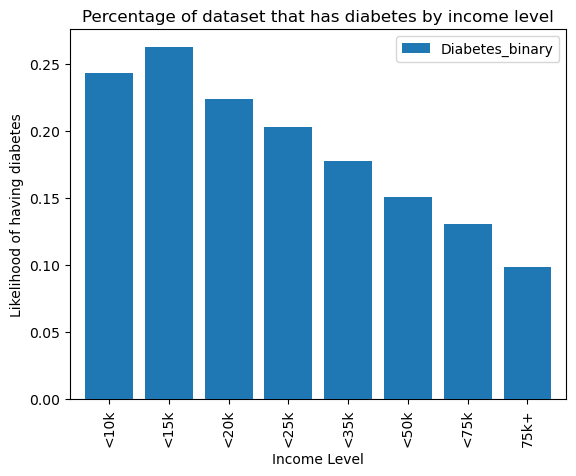

In [13]:
#plotting a bar chart showing how likely survey applicants were to list as Diabetic, based on income range
pd_bar = df_2.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Income Level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Percentage of dataset that has diabetes by income level")


Text(0, 0.5, 'Income Level')

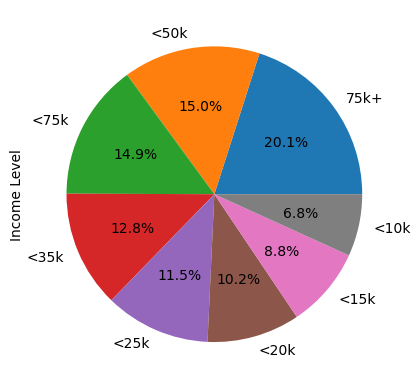

In [35]:
#The above bar chart seems to indicate that generally, the lower the income level, the more likely someone was to be diabetic
#To further explore this relationship, I will take only the respondents that are diabetic, and put this into a pie chart to see how these
#diabetic respondents are distributed according to income ranges 

diabetes_yes_df = diabetes_income.loc[diabetes_income["Diabetes_binary"] == 1.0] 

diabetes_distribution = diabetes_yes_df['Income'].value_counts()

pd_pie = diabetes_distribution.plot(kind='pie', autopct='%1.1f%%')
pd_pie.set_ylabel("Income Level")

In [16]:
#Pie chart gives us a clearer indication- considering the vast majority of Diabetes sufferers were from the higher income brackets

#Performing ANOVA test to see if results are statistically significant
sample_df = diabetes_income.sample(frac=0.1, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

groupa = sample_df[sample_df["Income"] == "<10k"]["Diabetes_binary"]
groupb = sample_df[sample_df["Income"] == "<15k"]["Diabetes_binary"]
groupc = sample_df[sample_df["Income"] == "<20k"]["Diabetes_binary"]
groupd = sample_df[sample_df["Income"] == "<25k"]["Diabetes_binary"]
groupe = sample_df[sample_df["Income"] == "<35k"]["Diabetes_binary"]
groupf = sample_df[sample_df["Income"] == "<50k"]["Diabetes_binary"]
groupg = sample_df[sample_df["Income"] == "<75k"]["Diabetes_binary"]
grouph = sample_df[sample_df["Income"] == "75k+"]["Diabetes_binary"]

#'<10k','<15k','<20k','<25k', '<35k', '<50k', '<75k', '75k+'

In [17]:

st.f_oneway(groupa, groupb, groupc, groupd, groupe, groupf, groupg, grouph)
#result shows some statistical significance

F_onewayResult(statistic=62.28806613961869, pvalue=3.29700261083124e-89)

In [19]:
#Now looking at the relationship between Diabetes and Education
df_3 = diabetes_df[["Diabetes_binary", "Education"]]
df_3.head()

,Diabetes_binary,Education
0,0.0,4.0
1,0.0,6.0
2,0.0,4.0
3,0.0,3.0
4,0.0,5.0


In [20]:
#set range for education
bins = [0,1.0,2.0,3.0,4.0,5.0,6.0]
#name the ranges
group_names=['No School','Elementary School','Some High School','High School Graduate', 'Some College or Technical Scl', 'College Graduate']
#rename values of education column
df_3['Education']=pd.cut(df_3['Education'],bins,labels=group_names)

df_3.head(10)

C:\Users\rohan\AppData\Local\Temp\ipykernel_2112\3884548712.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Education']=pd.cut(df_3['Education'],bins,labels=group_names)


,Diabetes_binary,Education
0,0.0,High School Graduate
1,0.0,College Graduate
2,0.0,High School Graduate
3,0.0,Some High School
4,0.0,Some College or Technical Scl
5,0.0,College Graduate
6,0.0,College Graduate
7,0.0,High School Graduate
8,1.0,Some College or Technical Scl
9,0.0,High School Graduate


In [21]:
education_diabetes = df_3.groupby("Education").mean()
education_diabetes

,Diabetes_binary
Education,
No School,0.270115
Elementary School,0.292822
Some High School,0.242527
High School Graduate,0.180486
Some College or Technical Scl,0.155183
College Graduate,0.115931


Text(0.5, 1.0, 'Percentage of dataset that has diabetes by education level')

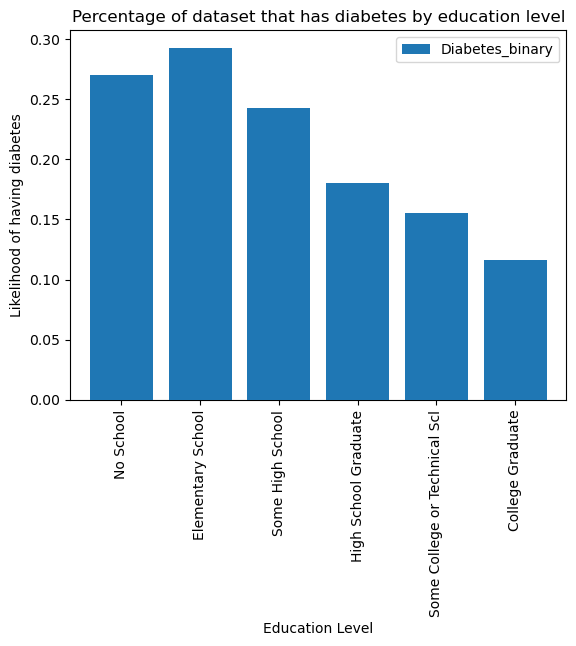

In [22]:
pd_bar = education_diabetes.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Education Level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Percentage of dataset that has diabetes by education level")


Text(0, 1, 'Education Level')

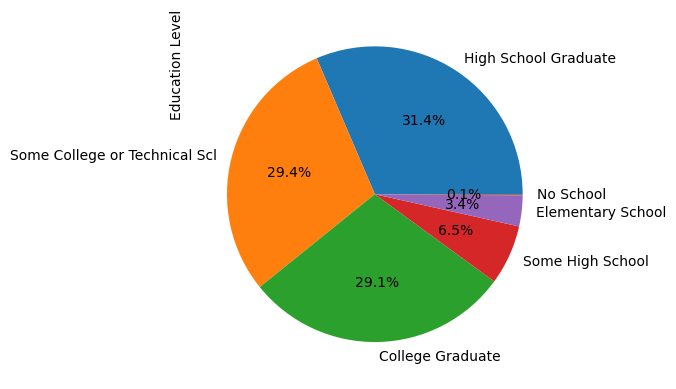

In [39]:
diabetes_yes = df_3.loc[df_3["Diabetes_binary"] == 1.0] 

diabetes_dist = diabetes_yes['Education'].value_counts()

pd_pie = diabetes_dist.plot(kind='pie', autopct='%1.1f%%')
pd_pie.set_ylabel("Education Level", loc='top')

In [23]:
s_df = df_3.sample(frac=0.1, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)


group0 = s_df[s_df["Education"] == "No School"]["Diabetes_binary"]
group1 = s_df[s_df["Education"] == "Elementary School"]["Diabetes_binary"]
group2 = s_df[s_df["Education"] == "Some High School"]["Diabetes_binary"]
group3 = s_df[s_df["Education"] == "High School Graduate"]["Diabetes_binary"]
group4 = s_df[s_df["Education"] == "Some College or Technical Scl"]["Diabetes_binary"]
group5 = s_df[s_df["Education"] == "College Graduate"]["Diabetes_binary"]

In [24]:

st.f_oneway(group0, group1, group2, group3, group4, group5)

F_onewayResult(statistic=57.00521651561775, pvalue=3.9123649469515963e-59)

In [26]:
fruits_veg_df = diabetes_df[["Diabetes_binary", "Fruits", "Veggies"]]
fruits_veg_df

,Diabetes_binary,Fruits,Veggies
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0
...,...,...,...
253675,0.0,1.0,1.0
253676,1.0,0.0,0.0
253677,0.0,1.0,0.0
253678,0.0,1.0,1.0


In [44]:
fruits_veg_df['Diet rating'] = fruits_veg_df["Fruits"] + fruits_veg_df["Veggies"]
fruits_veg_df

C:\Users\rohan\AppData\Local\Temp\ipykernel_2112\3592346126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruits_veg_df['Diet rating'] = fruits_veg_df["Fruits"] + fruits_veg_df["Veggies"]


,Diabetes_binary,Fruits,Veggies,Health rating,Diet rating
0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0
3,0.0,1.0,1.0,2.0,2.0
4,0.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...
253675,0.0,1.0,1.0,2.0,2.0
253676,1.0,0.0,0.0,0.0,0.0
253677,0.0,1.0,0.0,1.0,1.0
253678,0.0,1.0,1.0,2.0,2.0


Text(0, 1, 'Health rating')

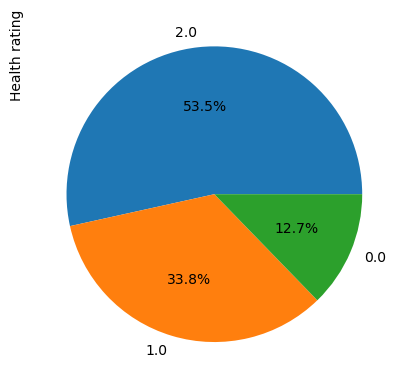

In [45]:
health_value = fruits_veg_df["Diet rating"].value_counts()
pd_pie = health_value.plot(kind='pie', autopct='%1.1f%%')
pd_pie.set_ylabel("Health rating", loc='top')

In [28]:
#we are looking at the diabetes rate of the respondents who ate both fruit and vegetables, verses those who ate neither.
new_df = fruits_veg_df.loc[fruits_veg_df["Health rating"] != 1.0]
new_df2 = new_df[["Diabetes_binary", "Health rating"]]
new_df2



,Diabetes_binary,Health rating
1,0.0,0.0
3,0.0,2.0
4,0.0,2.0
5,0.0,2.0
6,0.0,0.0
...,...,...
253672,0.0,2.0
253673,0.0,2.0
253675,0.0,2.0
253676,1.0,0.0


In [29]:
new_df2['Health rating'] = new_df['Health rating'].map({0.0:'Poor', 2.0:'Good'}) 
new_df2

C:\Users\rohan\AppData\Local\Temp\ipykernel_2112\1264795813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['Health rating'] = new_df['Health rating'].map({0.0:'Poor', 2.0:'Good'})


,Diabetes_binary,Health rating
1,0.0,Poor
3,0.0,Good
4,0.0,Good
5,0.0,Good
6,0.0,Poor
...,...,...
253672,0.0,Good
253673,0.0,Good
253675,0.0,Good
253676,1.0,Poor


In [30]:
health_mean = new_df2.groupby("Health rating").mean()
health_mean

,Diabetes_binary
Health rating,
Good,0.139968
Poor,0.180266


Text(0.5, 1.0, 'Percentage of dataset that has diabetes by diet habits')

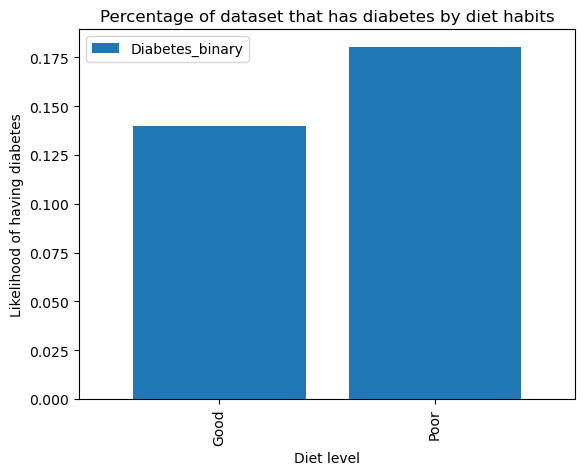

In [31]:
pd_bar = health_mean.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Diet level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Percentage of dataset that has diabetes by diet habits")

In [32]:
samp_df = new_df2.sample(frac=0.1, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)
option1 = samp_df[samp_df["Health rating"] == "Good"]["Diabetes_binary"]
option2 = samp_df[samp_df["Health rating"] == "Poor"]["Diabetes_binary"]

st.ttest_ind(option1, option2, equal_var=False)

Ttest_indResult(statistic=-3.443307620248037, pvalue=0.0005801267549998444)

In [50]:
health_issues_df = diabetes_df[["Diabetes_binary", "HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack", ]]
health_issues_df["Health Problem Level"] = health_issues_df["HighBP"] + health_issues_df["HighChol"] + health_issues_df["Stroke"] + health_issues_df["HeartDiseaseorAttack"]
health_issues_df

C:\Users\rohan\AppData\Local\Temp\ipykernel_2112\34982025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_issues_df["Health Problem Level"] = health_issues_df["HighBP"] + health_issues_df["HighChol"] + health_issues_df["Stroke"] + health_issues_df["HeartDiseaseorAttack"]


,Diabetes_binary,HighBP,HighChol,Stroke,HeartDiseaseorAttack,Health Problem Level
0,0.0,1.0,1.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,2.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...
253675,0.0,1.0,1.0,0.0,0.0,2.0
253676,1.0,1.0,1.0,0.0,0.0,2.0
253677,0.0,0.0,0.0,0.0,0.0,0.0
253678,0.0,1.0,0.0,0.0,0.0,1.0


In [54]:
health_issues_df.groupby("Diabetes_binary")["Health Problem Level"].value_counts()

Diabetes_binary  Health Problem Level
0.0              0.0                     78475
                 1.0                     65384
                 2.0                     39665
                 3.0                      9549
                 4.0                      1304
1.0              2.0                     14953
                 1.0                      9832
                 3.0                      5525
                 0.0                      3609
                 4.0                      1178
Name: Health Problem Level, dtype: int64

In [57]:
yes_diabetes = health_issues_df[health_issues_df["Diabetes_binary"] == 1.0]
yes_diabetes

,Diabetes_binary,HighBP,HighChol,Stroke,HeartDiseaseorAttack,Health Problem Level
8,1.0,1.0,1.0,0.0,1.0,3.0
10,1.0,0.0,0.0,0.0,0.0,0.0
13,1.0,1.0,1.0,0.0,0.0,2.0
17,1.0,0.0,0.0,0.0,0.0,0.0
23,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
253659,1.0,0.0,1.0,0.0,0.0,1.0
253668,1.0,0.0,1.0,0.0,1.0,2.0
253670,1.0,1.0,1.0,0.0,1.0,3.0
253676,1.0,1.0,1.0,0.0,0.0,2.0
